In [ ]:
#TASK 3

#CUSTOMER CHURN PREDICTION

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, confusion_matrix

In [4]:
data = pd.read_csv("E:/Dhruvi Desktop Files/Internship and Course Certificate/PDF_ML_CodSoft_ML/Churn_Modelling.csv")
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [5]:
x = data.iloc[:,6:8].values
print(x)

[[42  2]
 [41  1]
 [42  8]
 ...
 [36  7]
 [42  3]
 [28  4]]


In [6]:
y = data.iloc[:,4].values
print(y)

['France' 'Spain' 'France' ... 'France' 'Germany' 'France']


In [7]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=108)
x_train

array([[31,  6],
       [30,  2],
       [29,  9],
       ...,
       [46,  8],
       [19,  8],
       [41,  9]], dtype=int64)

In [8]:
y_train

array(['Spain', 'Spain', 'France', ..., 'Spain', 'Germany', 'France'],
      dtype=object)

In [9]:
missing_values = data.isna().sum()
missing_values

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [10]:
le_y = LabelEncoder()
Y=le_y.fit_transform(y)
Y

array([0, 2, 0, ..., 0, 1, 0])

In [11]:
rfr = RandomForestClassifier()
rfr.fit(x_train,y_train)
y_prediction1=rfr.predict(x_test)
y_prediction1

array(['France', 'France', 'France', ..., 'France', 'Spain', 'France'],
      dtype=object)

In [12]:
#accuracy score
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)
acc_sc=accuracy_score(y_train,y_pred=clf.predict(x_train))
print("Accuracy score is ",acc_sc)

Accuracy score is  0.539375


In [13]:
#Data accuracy score
data_accSc=accuracy_score(y_test,y_pred=y_prediction1)

print("Test data accuracy",data_accSc)  

Test data accuracy 0.4485


In [14]:
# precision Score
random_forest_precision = precision_score(y_test,y_prediction1,average='weighted')

print("precision Score",random_forest_precision)

precision Score 0.3668304747454757


In [15]:
#Recall Score
random_forest_recall = recall_score(y_test,y_prediction1,average='weighted')

print("Recall Score",random_forest_recall)

Recall Score 0.4485


In [16]:
#F1 Score
random_forest_f1 = f1_score(y_test,y_prediction1,average='weighted')

print("F1 Score",random_forest_f1)

F1 Score 0.36415330366604814


In [17]:
#confusion matrix
con_mat=confusion_matrix(y_test,y_prediction1)
print("Confusion Matrix", con_mat)

Confusion Matrix [[816  82  90]
 [435  45  37]
 [423  36  36]]


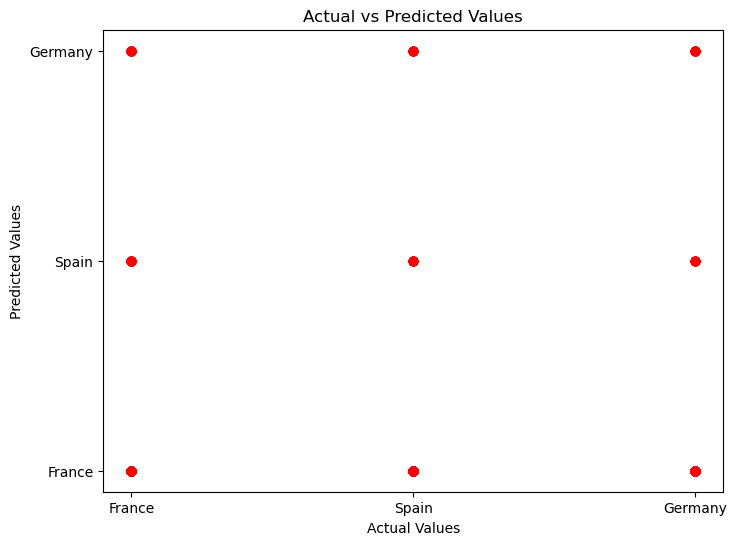

In [18]:
# Plotting actual vs predicted
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_prediction1, color='red', alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()